
🔹 Match Predictions 🔹
            Player Team  Win  Predicted_Win
0         MS Dhoni  CSK    1              1
1  Ruturaj Gaikwad  CSK    1              1
2  Ravindra Jadeja  CSK    1              0
3      Shivam Dube  CSK    1              1
4    Deepak Chahar  CSK    1              0
5      Virat Kohli  RCB    0              0
6   Faf du Plessis  RCB    0              1
7    Glenn Maxwell  RCB    0              0
8   Mohammed Siraj  RCB    0              0
9    Harshal Patel  RCB    0              1


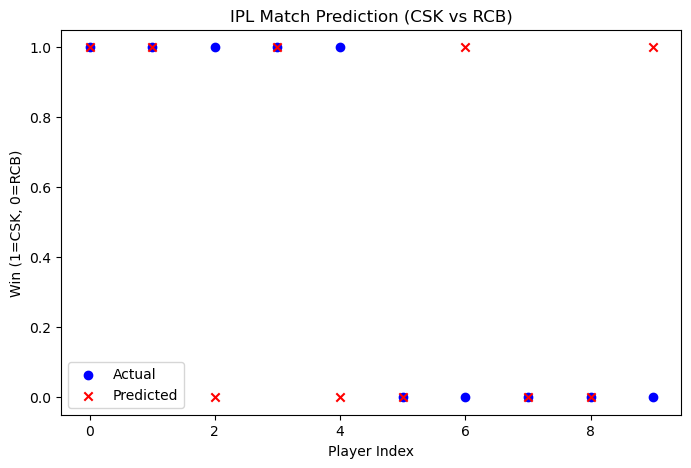

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample Player Data (10 Players from CSK and RCB)
data = {
    'Player': ['MS Dhoni', 'Ruturaj Gaikwad', 'Ravindra Jadeja', 'Shivam Dube', 'Deepak Chahar',
               'Virat Kohli', 'Faf du Plessis', 'Glenn Maxwell', 'Mohammed Siraj', 'Harshal Patel'],
    'Team': ['CSK', 'CSK', 'CSK', 'CSK', 'CSK', 'RCB', 'RCB', 'RCB', 'RCB', 'RCB'],
    'Batting_Avg': [40, 50, 35, 38, 10, 55, 48, 42, 12, 8],  # Sample Batting Avg
    'Bowling_Avg': [0, 20, 25, 35, 22, 0, 18, 30, 23, 21],  # Sample Bowling Avg
    'Strike_Rate': [135, 145, 130, 150, 120, 155, 140, 148, 125, 115],  # Sample Strike Rate
    'Wickets': [0, 0, 15, 2, 20, 0, 0, 10, 25, 18],  # Sample Wickets
    'Win': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]  # 1 = CSK Wins, 0 = RCB Wins
}

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Independent (X) and Dependent (Y) Variables
X = df[['Batting_Avg', 'Bowling_Avg', 'Strike_Rate', 'Wickets']].values
y = df['Win'].values

# Normalize Features (to avoid overflow)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# ----------------- Logistic Regression Model -----------------
class IPLPredictionModel:
    def __init__(self):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def train(self, X, y, lr=0.01, epochs=1000):
        m = X.shape[0]
        for _ in range(epochs):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)

            # Compute Gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)

            # Update Weights & Bias
            self.weights -= lr * dw
            self.bias -= lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        probabilities = self.sigmoid(z)
        return [1 if p >= 0.5 else 0 for p in probabilities]  # 1 = CSK Wins, 0 = RCB Wins

# Train the Model
model = IPLPredictionModel()
model.train(X, y)

# Predict Results
predictions = model.predict(X)
df['Predicted_Win'] = predictions

# ----------------- Display Results -----------------
print("\n🔹 Match Predictions 🔹")
print(df[['Player', 'Team', 'Win', 'Predicted_Win']])

# ----------------- Visualization -----------------
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df['Win'], color='blue', label='Actual')
plt.scatter(df.index, df['Predicted_Win'], color='red', marker='x', label='Predicted')
plt.xlabel("Player Index")
plt.ylabel("Win (1=CSK, 0=RCB)")
plt.title("IPL Match Prediction (CSK vs RCB)")
plt.legend()
plt.show()
